In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import timeit

import ruptures as rpt


In [2]:
beijing_a = pd.read_csv("/home/aumaron/Desktop/datasets/beijing_multi_site_air_quality_data/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
beijing_b = pd.read_csv("/home/aumaron/Desktop/datasets/beijing_multi_site_air_quality_data/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
beijing_c = pd.read_csv("/home/aumaron/Desktop/datasets/beijing_multi_site_air_quality_data/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")

In [3]:
print(beijing_a.shape)
print(beijing_b.shape)
print(beijing_c.shape)

(35064, 18)
(35064, 18)
(35064, 18)


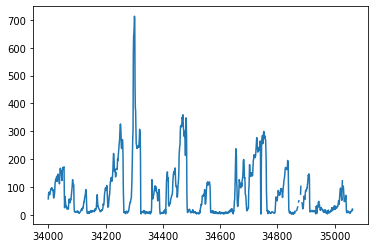

In [4]:
beijing_a["time_date"] = pd.to_datetime(beijing_a[["year", "month", "day", "hour"]])
beijing_a.set_index("time_date")
plt.plot(beijing_a.index[34000:], beijing_a.loc[34000:, "PM2.5"])

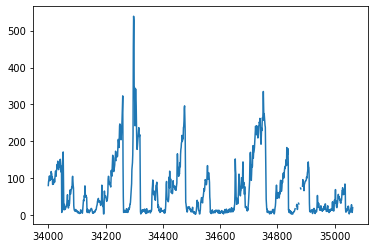

In [5]:
beijing_b["time_date"] = pd.to_datetime(beijing_b[["year", "month", "day", "hour"]])
beijing_b.set_index("time_date")
plt.plot(beijing_b.index[34000:], beijing_b.loc[34000:, "PM2.5"])

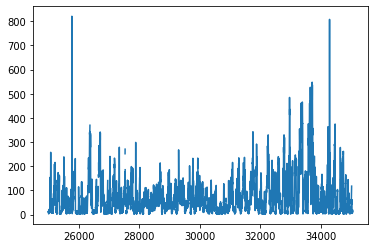

In [6]:
beijing_c["time_date"] = pd.to_datetime(beijing_c[["year", "month", "day", "hour"]])
beijing_c.set_index("time_date")
plt.plot(beijing_c.index[25000:], beijing_c.loc[25000:, "PM2.5"])

### Apple DataSet - dot com crash

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


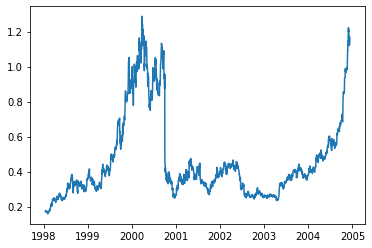

In [2]:
apple = pd.read_csv("/home/aumaron/Desktop/datasets/AAPL_1999_2004_change_point.csv")
apple["Date"] = pd.to_datetime(apple["Date"])
plt.plot(apple["Date"], apple["Close"])

### Python Package :: Ruptures

**A.** *We use the Pelt method as the number of breakpoints are not know to us before-hand. In case we know the number of break points, we would refer to the function Dynp*

**A.1** *Testing the Python implementation first*

In [8]:
# Pythonic implementation

import time
start_time = time.time()

import ruptures as rpt
# detection
algo_a = rpt.Pelt(model="l2").fit(apple["Close"].values)
result_a = algo_a.predict(pen=20)  # pen => penalty value | Also, termed as beta
# If we reduce the penalty value, the number of breakpoints found will increase

print(f"Execution time -> {time.time() - start_time:.3f} s")
print("BreakPoints -> ", result_a)

Execution time -> 0.952 s
BreakPoints ->  [445, 685, 1739]


**A.2** *Testing the C implementation*

In [9]:
# C implementation

import time
start_time = time.time()

import ruptures as rpt
# detection
algo_b = rpt.KernelCPD(kernel="linear").fit(apple["Close"].values)
result_b = algo_b.predict(pen=20)

print(f"Execution time -> {time.time() - start_time:.3f} s")
print("BreakPoints -> ", result_b)

Execution time -> 0.031 s
BreakPoints ->  [446, 685, 1739]


**B.** *Comparing their results*

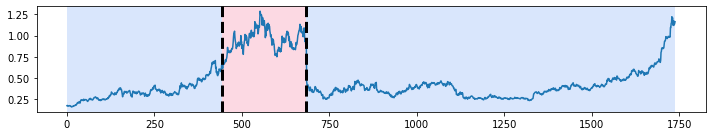

In [10]:
# display
rpt.display(apple["Close"].values, result_a, result_a)
plt.show()

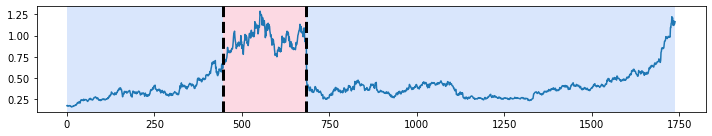

In [11]:
# display
rpt.display(apple["Close"].values, result_b, result_b)
plt.show()

### Linear Cost functions

In [13]:
ts = [166955.16, 97720.68, 85217.6, 103039.55, 83467.94, 80110.81, 144686.76, 115195.59, 121114.55, 108206.59, 78635.89, 35243.84, 102666.0, 57509.83, 162441.23, 166822.61, 161298.89, 116745.22, 131769.16, 74970.28, 11758.39, 110578.03, 78553.95, 89883.36, 101398.34, 188457.18, 90466.58, 168042.07, 94522.61, 208754.2, 133844.17, 114009.87, 87169.7, 25599.02, 155712.51, 145923.09, 71162.48, 143204.61, 88032.48, 142867.21, 116644.0, 64886.84, 149451.33, 101620.06, 104483.14, 122268.94, 62623.85, 137116.95, 99359.48, 120222.85, 119777.0, 205640.48, 42587.11, 57415.84, 56916.97, 122061.68, 90958.22, 83511.32, 73777.33, 64802.49, 76782.6, 167789.02, 218276.11, 60454.85, 105331.46, 122283.4, 96457.84, 154881.06,
      114470.18, 63474.58, 132268.03, 41859.29, 135955.33, 130296.65, 91840.28, 108334.32, 66434.06, 57601.41, 142310.5, 123425.74, 109064.55, 156240.3, 69463.43, 110264.73, 41266.43, 90336.44, 99901.73, 55755.35, 181330.81, 105924.32, 104810.9]

In [46]:
signal = apple.iloc[:, 4]

In [14]:
# signal = apple['Close'].values
signal = np.array(ts)

In [57]:
signal.mean(axis=0)

0.49141998880842663

In [52]:
# Linear model with only beta_0 (theoretically identical to the L2 model)
linear_signal = np.column_stack((signal, np.ones(signal.shape[0])))
_cost = rpt.costs.CostLinear()
# detection
algo_c = rpt.Pelt(custom_cost=_cost, min_size=100).fit(linear_signal)
result_c = algo_c.predict(pen=np.log(signal.shape[0])*1)  # Excluding the date column and the target column

# print(f"Execution time -> {time.time() - start_time:.3f} s")
print("BreakPoints -> ", result_c)

BreakPoints ->  [235, 465, 1390, 1519]


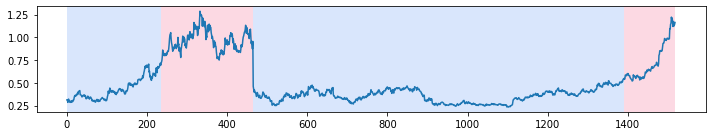

In [53]:
# display
rpt.display(signal, result_c)
plt.show()

In [15]:
_cost = rpt.costs.CostLinear().fit(linear_signal)
print(_cost.error(0,len(apple["Close"])))
print(_cost.sum_of_costs([1739]))

101.93597577410739
101.93597577410739


### Radial basis cost function

In [149]:
_cost = rpt.costs.CostRbf().fit(np.array(apple["Close"]).reshape(-1,1))
# detection
algo_c = rpt.Pelt(custom_cost=_cost).fit(np.array(apple.loc[:,["Open", "High", "Low", "Close", "Adj Close", "Volume"]]))
result_c = algo_c.predict(pen=np.log(apple.shape[0])*(apple.shape[1] - 2))  # Excluding the date column and the target column

# print(f"Execution time -> {time.time() - start_time:.3f} s")
print("BreakPoints -> ", result_c)

BreakPoints ->  [120, 370, 455, 685, 1115, 1365, 1545, 1665, 1739]


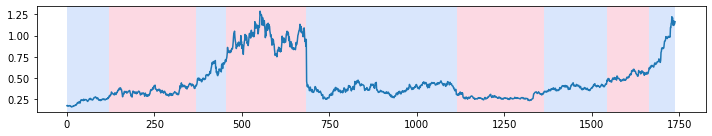

In [150]:
# display
rpt.display(apple["Close"].values, result_c)
plt.show()

In [120]:
_cost = rpt.costs.CostRbf().fit(np.array(apple["Close"]).reshape(-1,1))
print(_cost.error(0,len(apple["Close"])))
print(_cost.sum_of_costs([395, 685, 1545, 1739]))

1000.1025498367619
644.7955957640976


### CostAR

In [146]:
_cost = rpt.costs.CostAR(order=30).fit(np.array(apple["Close"]))
# detection
algo_c = rpt.Pelt(custom_cost=_cost).fit(np.array(apple.loc[:,["Open", "High", "Low", "Close", "Adj Close", "Volume"]]))
result_c = algo_c.predict(pen=2*(apple.shape[1] - 2))  # Excluding the date column and the target column

# print(f"Execution time -> {time.time() - start_time:.3f} s")
print("BreakPoints -> ", result_c)

BreakPoints ->  [35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455, 490, 525, 560, 595, 635, 685, 725, 760, 800, 835, 870, 905, 940, 975, 1010, 1045, 1085, 1120, 1155, 1190, 1230, 1265, 1305, 1340, 1380, 1415, 1450, 1495, 1530, 1565, 1600, 1635, 1670, 1705, 1739]


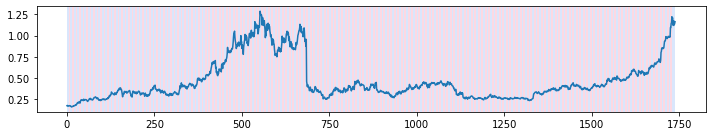

In [140]:
# display
rpt.display(apple["Close"].values, result_c)
plt.show()

In [141]:
_cost = rpt.costs.CostAR(order=3).fit(np.array(apple["Close"]).reshape(-1,1))
print(_cost.error(0,len(apple["Close"])))
print(_cost.sum_of_costs([395, 685, 1545, 1739]))

0.9122764417345537
0.8644455944133281
